# __Title__

If you like this, you may want to experiment with a little markdown.

## __Process__

1. Collection
2. Cleaning
3. Subsetting
4. Model Selection

### __Collection__

After obtaining the raw data from an online source, the data must be converted into a format that Python can use. In order to import and manipulate this data, pandas, a free Python library, will be used. Below is code that creates a dataframe for our data.

In [145]:
import pandas as pd

col_names = ["Origin", "Destination", "Origin City", "Destination City", "Passengers", "Seats", "Flights", "Distance",
      "Fly Date", "Origin Population", "Destination Population"]
data = pd.read_csv(r"data/flight_edges.tsv", sep="\t", names=col_names)

data

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",1,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034
...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119.0,200902,2828990,46457
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119.0,200911,2828990,46457
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119.0,200908,2828990,46457
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146.0,200908,93712,46457


*__Converting month and year to datetime objects and setting them as the index.__*

In [146]:
data.loc[:, "Fly Date"] = pd.to_datetime(data.loc[:, "Fly Date"].copy(), format="%Y%m")
data.set_index("Fly Date", inplace=True)
data = data.sort_index()

data

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
2009-12-01,CLE,CLT,"Cleveland, OH","Charlotte, NC",513,600,12,430.0,2091286,1745524
2009-12-01,CLE,CLT,"Cleveland, OH","Charlotte, NC",944,1150,23,430.0,2091286,1745524
2009-12-01,SAT,DRT,"San Antonio, TX","Del Rio, TX",0,0,39,152.0,2072128,48165


*__Demonstration of the dataframe__*

In [147]:
data['Passengers'].max()

89597

In [148]:
data.loc['1990']

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
1990-12-01,BDL,PIT,"Hartford, CT","Pittsburgh, PA",152,200,2,406.0,1124185,2468674
1990-12-01,SEA,LAX,"Seattle, WA","Los Angeles, CA",391,640,5,954.0,5154164,22585772
1990-12-01,JFK,RDU,"New York, NY","Raleigh, NC",41,118,1,426.0,33737966,548230


In [149]:
data.query('index == 1990')

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
1990-01-01,ORD,CLE,"Chicago, IL","Cleveland, OH",512,1662,16,316.0,16395048,2103367
1990-01-01,CHA,GSO,"Chattanooga, TN","Greensboro, NC",28,63,1,305.0,433423,541858
1990-01-01,GSO,RDU,"Greensboro, NC","Raleigh, NC",88,603,5,67.0,541858,548230


In [150]:
data.loc['1990']['Passengers'].max()

54564

### __Cleaning__

Once the data has been imported into Python, it must be manipulated into a usable form. Below is an example of this, showing the maximum of each column in each year.

In [151]:
num_cols = ['Passengers', 'Seats', 'Flights', 'Distance', 'Origin Population', 'Destination Population']
data_yearly_max = data[num_cols].resample('Y').max()

data_yearly_max

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-12-31,54564,88094,624,4983.0,33737966,33737966
1991-12-31,63604,99592,844,4983.0,33749684,33749684
1992-12-31,54395,96744,707,4502.0,33861848,33861848
1993-12-31,67354,93825,716,4502.0,34026518,34026518
1994-12-31,83153,147062,1128,4862.0,34144436,34144436
1995-12-31,82298,140946,1044,4983.0,34261384,34261384
1996-12-31,76554,130938,942,5018.0,34380072,34380072
1997-12-31,70514,115370,830,4502.0,34528632,34528632
1998-12-31,73703,112402,893,4983.0,34683010,34683010


In [152]:
data_yearly_mean = data[num_cols].resample('Y').mean()

data_yearly_mean

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-12-31,2588.756182,4658.978935,35.624579,644.415063,5.839990e+06,5.892388e+06
1991-12-31,2549.077809,4548.894357,35.395525,648.015836,5.836108e+06,5.863512e+06
1992-12-31,2615.470128,4588.220197,35.944255,650.115987,5.982175e+06,5.995151e+06
1993-12-31,2694.244565,4665.995522,36.967815,655.180401,5.986772e+06,6.048870e+06
1994-12-31,2889.648744,4754.085252,38.316272,662.936732,5.871819e+06,5.936238e+06
1995-12-31,3037.455453,4945.799010,41.758974,666.925485,5.743808e+06,5.725043e+06
1996-12-31,3075.688037,4779.466659,40.777504,676.681898,5.695619e+06,5.731503e+06
1997-12-31,3178.347018,4877.249596,40.940928,693.292523,5.785903e+06,5.772043e+06
1998-12-31,3227.698704,4856.540146,41.023490,700.691493,5.892154e+06,5.898313e+06


In [153]:
data_monthly_mean = data[num_cols].resample('M').mean()

data_monthly_mean

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-31,2291.453308,4610.214991,35.059849,649.786254,5.886629e+06,5.951160e+06
1990-02-28,2277.277380,4206.596746,32.034483,647.897901,5.867701e+06,5.807857e+06
1990-03-31,2801.016662,4800.271444,36.510414,649.082122,5.838691e+06,5.796940e+06
1990-04-30,2754.200707,4871.893640,37.104152,650.161219,5.902578e+06,5.809447e+06
1990-05-31,2571.354100,4681.915616,35.889328,630.070705,5.820051e+06,5.928812e+06
...,...,...,...,...,...,...
2009-08-31,2764.142824,3479.438377,36.213865,711.958040,6.281118e+06,6.416520e+06
2009-09-30,2473.780803,3315.254922,34.770331,716.084256,6.246446e+06,6.234258e+06
2009-10-31,2619.854094,3351.338218,35.017213,714.905559,6.155436e+06,6.108220e+06


In [154]:
data_3m_roll = data_monthly_mean[num_cols].rolling(window=3, center=True).mean()

data_3m_roll

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-28,2456.582450,4539.027727,34.534915,648.922092,5.864341e+06,5.851985e+06
1990-03-31,2610.831583,4626.253943,35.216350,649.047081,5.869657e+06,5.804748e+06
1990-04-30,2708.857156,4784.693567,36.501298,643.104682,5.853773e+06,5.845066e+06
1990-05-31,2685.557307,4724.036297,36.135111,643.166368,5.856120e+06,5.883254e+06
...,...,...,...,...,...,...
2009-08-31,2734.732522,3469.550823,36.237844,713.671698,6.279770e+06,6.378209e+06
2009-09-30,2619.259240,3382.010506,35.333803,714.315952,6.227667e+06,6.252999e+06
2009-10-31,2497.849322,3284.656013,34.333346,719.448572,6.178192e+06,6.164067e+06


In [155]:
data_monthly_mean = data[num_cols].groupby(data.index).mean()

data_monthly_mean

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-01,2291.453308,4610.214991,35.059849,649.786254,5.886629e+06,5.951160e+06
1990-02-01,2277.277380,4206.596746,32.034483,647.897901,5.867701e+06,5.807857e+06
1990-03-01,2801.016662,4800.271444,36.510414,649.082122,5.838691e+06,5.796940e+06
1990-04-01,2754.200707,4871.893640,37.104152,650.161219,5.902578e+06,5.809447e+06
1990-05-01,2571.354100,4681.915616,35.889328,630.070705,5.820051e+06,5.928812e+06
...,...,...,...,...,...,...
2009-08-01,2764.142824,3479.438377,36.213865,711.958040,6.281118e+06,6.416520e+06
2009-09-01,2473.780803,3315.254922,34.770331,716.084256,6.246446e+06,6.234258e+06
2009-10-01,2619.854094,3351.338218,35.017213,714.905559,6.155436e+06,6.108220e+06


*__Using matplotlib, a graphing library, to plot the previously examples__*

Text(0.5, 1.0, 'Passenger Trends')

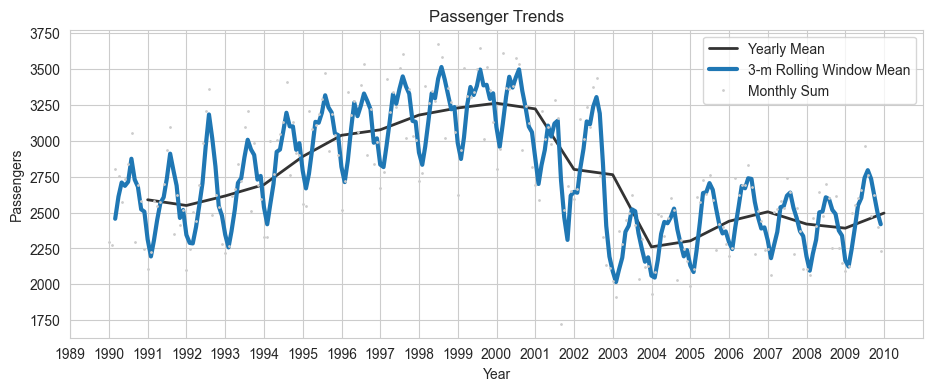

In [156]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(11, 4))

# plot yearly mean data
ax.plot(data_yearly_mean['Passengers'], color='0.2', linewidth=2, label='Yearly Mean')

# plot monthly rolling mean
ax.plot(data_3m_roll['Passengers'], linewidth=3, label='3-m Rolling Window Mean')

# plot monthly sums
ax.plot(data_monthly_mean['Passengers'], marker='.', markersize=2, color='0.8', linestyle='None', label='Monthly Sum')

# Pretty it up
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
ax.set_title('Passenger Trends')

*__Using seaborn, a different graphing library, to plot a new example__*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009')])

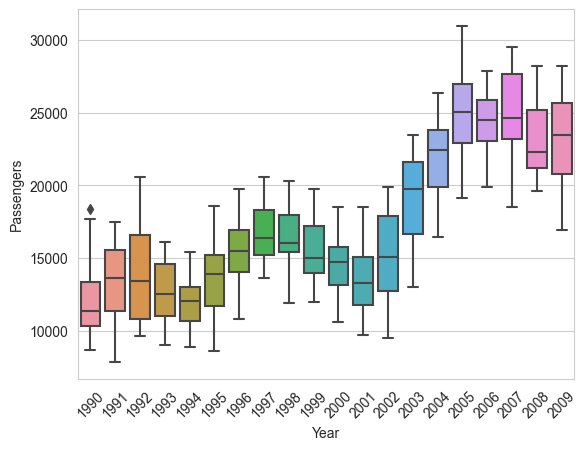

In [157]:
import seaborn as sns


dat2 = data[data["Destination"] == "MFR"]


dat2 = dat2[['Passengers', 'Flights']]
dat2 = dat2.groupby("Fly Date").sum()
dat2['Average'] = dat2['Passengers'] / dat2['Flights']
dat2['Year'] = dat2.index.year

sns.set_style('whitegrid')
sns.boxplot(data=dat2, x='Year', y='Passengers')
plt.xticks(rotation=45)

### Time series forecasting
- Goal: Predict x
- Training Data: 
- Test Data:
- Performance Metric:


In [158]:
data

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,SEA,ORD,"Seattle, WA","Chicago, IL",1713,4410,30,1721.0,5154164,16395048
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1476,4619,31,404.0,2103367,16868983
1990-01-01,CRW,ROA,"Charleston, WV","Roanoke, VA",388,2100,21,114.0,307480,269195
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",1337,3348,31,404.0,2103367,16868983
1990-01-01,CLE,EWR,"Cleveland, OH","Newark, NJ",2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...,...,...,...,...
2009-12-01,CLE,CLT,"Cleveland, OH","Charlotte, NC",513,600,12,430.0,2091286,1745524
2009-12-01,CLE,CLT,"Cleveland, OH","Charlotte, NC",944,1150,23,430.0,2091286,1745524
2009-12-01,SAT,DRT,"San Antonio, TX","Del Rio, TX",0,0,39,152.0,2072128,48165


*__Below is the data that we will use for a model__*

In [159]:
numData = data[num_cols]
numData

,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,
1990-01-01,1713,4410,30,1721.0,5154164,16395048
1990-01-01,1476,4619,31,404.0,2103367,16868983
1990-01-01,388,2100,21,114.0,307480,269195
1990-01-01,1337,3348,31,404.0,2103367,16868983
1990-01-01,2787,4888,52,404.0,2103367,16868983
...,...,...,...,...,...,...
2009-12-01,513,600,12,430.0,2091286,1745524
2009-12-01,944,1150,23,430.0,2091286,1745524
2009-12-01,0,0,39,152.0,2072128,48165


In [160]:
data_MFR = data[data["Destination"] == "MFR"]
data_passenger = data_MFR[["Passengers"]]
data_passenger

,Passengers
Fly Date,
1990-01-01,23
1990-01-01,227
1990-01-01,1384
1990-01-01,2420
1990-01-01,3674
...,...
2009-12-01,2978
2009-12-01,783
2009-12-01,134


In [161]:
data_passenger = data_passenger.groupby(data_passenger.index).sum()
data_passenger

,Passengers
Fly Date,
1990-01-01,8696
1990-02-01,9034
1990-03-01,11322
1990-04-01,11213
1990-05-01,12380
...,...
2009-08-01,27425
2009-09-01,24874
2009-10-01,25085


In [162]:
#Create new columns and drop rows with NaN present
data_passenger["Previous"] = data_passenger["Passengers"].shift(1)
data_passenger["Difference"] = data_passenger["Passengers"].diff()
data_passenger = data_passenger.dropna()
data_passenger

,Passengers,Previous,Difference
Fly Date,,,
1990-02-01,9034,8696.0,338.0
1990-03-01,11322,9034.0,2288.0
1990-04-01,11213,11322.0,-109.0
1990-05-01,12380,11213.0,1167.0
1990-06-01,16166,12380.0,3786.0
...,...,...,...
2009-08-01,27425,28212.0,-787.0
2009-09-01,24874,27425.0,-2551.0
2009-10-01,25085,24874.0,211.0


### Subsetting

Now that we have the dataframe formatted into the correct type of data, we have to break the data apart into a section to train our model on and a section to test that trained model on. In the code below, we subset all the data from 2008 and before into the training dataframe and the data from 2009 into the testing dataframe. While we are using a package that can do this for us, scikit-learn, understanding the premise behind the functions allows us to understand their importance. 

In [163]:
train = data_passenger.loc[:'2008', 'Passengers']

In [164]:
X_train = data_passenger[:'2008'].drop(["Passengers"], axis=1)
X_test = data_passenger['2009':].drop(["Passengers"], axis=1)

y_train = data_passenger[:'2008'].drop(["Previous", "Difference"], axis=1)
y_test = data_passenger['2009':].drop(["Previous", "Difference"], axis=1)

#y_train = data_passenger.loc[:'2008', 'Passengers']
#y_test = data_passenger.loc['2009':, 'Passengers']

y_test

,Passengers
Fly Date,
2009-01-01,17428
2009-02-01,16936
2009-03-01,20790
2009-04-01,20685
2009-05-01,24767
2009-06-01,27719
2009-07-01,28212
2009-08-01,27425
2009-09-01,24874


In [165]:
y_train

,Passengers
Fly Date,
1990-02-01,9034
1990-03-01,11322
1990-04-01,11213
1990-05-01,12380
1990-06-01,16166
...,...
2008-08-01,27163
2008-09-01,22069
2008-10-01,22805


*__Below we plot a naive forecast, which is where our prediction for each of the test values is simply the last value of the training set__*

            Passengers  naive_forecast
Fly Date                              
2009-01-01       17428           21535
2009-02-01       16936           21535
2009-03-01       20790           21535
2009-04-01       20685           21535
2009-05-01       24767           21535
2009-06-01       27719           21535
2009-07-01       28212           21535
2009-08-01       27425           21535
2009-09-01       24874           21535
2009-10-01       25085           21535
2009-11-01       22216           21535
2009-12-01       21535           21535


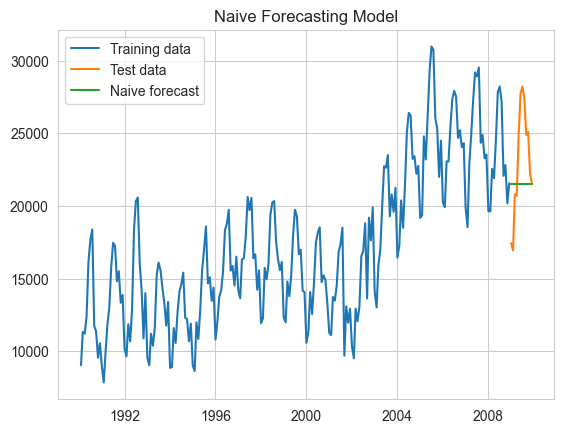

In [166]:
y_hat_naive = y_test.copy()
y_hat_naive['naive_forecast'] = y_test['Passengers'][-1]

print(y_hat_naive)

plt.plot(y_train, label='Training data')
plt.plot(y_test, label='Test data')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Naive Forecasting Model')
plt.show() 

### Model Selection

There are many different types of models that will forecast data, timeseries or otherwise. Rather than guess which model will best fit our data, we can use statistical tests in order to find out what the best model will be for us. To start with this, we will need to use a couple metrics to measure the accuracy of our model.

*__Metrics to test our prediction's accuracy__*

In [167]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, mae
    
metrics([1, 2, 3],[.8, 1.9, 2.7])

(0.93, 0.046666666666666634, 0.19999999999999996)

In [168]:
r2, mse, mae = metrics(y_test, y_hat_naive["naive_forecast"])
statsframe = pd.DataFrame()
statsframe["Name"] = pd.Series("naive_forecast")
statsframe["r2"] = pd.Series(r2)
statsframe["mse"] = pd.Series(mse)
statsframe["mae"] = pd.Series(mae)
statsframe

,Name,r2,mse,mae
0,naive_forecast,-0.192336,1.595609e+07,3321.166667


As you can see above, the $R^2$ value of the model is negative, while the mean squared error is very high, meaning that, as expected, the naive forecast of the model isn't a very good predictor of the actual data.

In [169]:
# from sklearn import linear_model
# y_hat_linear = linear_model.LinearRegression()
# y_hat_linear.fit(X_train, y_train)
# y_hat_linear.predict(X_test)


*__One of the models used for timeseries forecasting, sourced from the statsmodels library__*

In [170]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
model = ExponentialSmoothing(np.asarray(y_train["Passengers"]), seasonal_periods = 12, trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
model_fit.params

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.9242857142857143,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 11979.399999999992,
 'initial_trend': 164.09090909091015,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

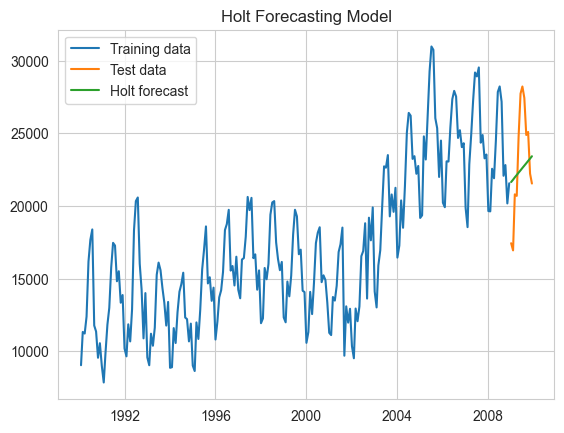

In [171]:
y_hat_holt = y_test.copy()
y_hat_holt["holt_forecast"] = model_fit.forecast(len(y_test))

plt.plot(y_train, label='Training data')
plt.plot(y_test, label='Test data')
plt.plot(y_hat_holt['holt_forecast'], label='Holt forecast')
plt.legend()
plt.title('Holt Forecasting Model')
plt.show() 

In [172]:
metrics(y_test, y_hat_holt["holt_forecast"])

(0.10150311276199375, 12023868.089302568, 3046.320619493276)

In [173]:
model = ExponentialSmoothing(np.asarray(y_train["Passengers"]), seasonal_periods = 12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
model_fit.params

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.7121428571428572,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': 0.11514285714285713,
 'damping_trend': nan,
 'initial_level': 12068.572222222216,
 'initial_trend': 43.730808080808856,
 'initial_seasons': array([-4068.05729167, -1774.28645833, -2053.890625  ,  -395.234375  ,
         2898.74479167,  4147.03645833,  4882.25520833,  1166.671875  ,
          549.19270833, -1676.296875  ,   -90.69270833, -3585.44270833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

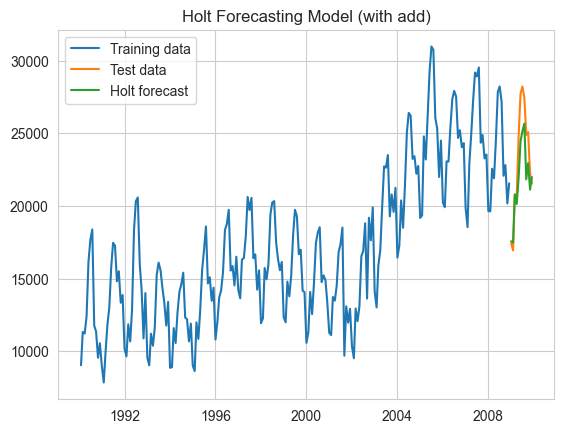

In [174]:
y_hat_holt_add = y_test.copy()
y_hat_holt_add["holt_forecast"] = model_fit.forecast(len(y_test))

plt.plot(y_train, label='Training data')
plt.plot(y_test, label='Test data')
plt.plot(y_hat_holt_add['holt_forecast'], label='Holt forecast')
plt.legend()
plt.title('Holt Forecasting Model (with add)')
plt.show()

In [175]:
metrics(y_test, y_hat_holt_add["holt_forecast"])

(0.7041175630810801, 3959558.950049073, 1582.0217340358186)

These metrics are much better, and, as indicated by the graph, predict the data much more accurately.

The next step is to make a function that takes in the model's name and statsmodel function to call just one function per model to show all these graphs!

In [176]:
def test_model(name, model):
    global y_test, y_train
    
    model_fit = model.fit()
    #y_hat_model=model_fit.forecast(len(y_test))
    y_hat_model = y_test.copy()
    y_hat_model[name] = model_fit.forecast(len(y_test))
    
    plt.plot(y_train, label='Training data')
    plt.plot(y_test, label='Test data')
    plt.plot(y_hat_model[name], label=name)
    
    plt.legend()
    plt.title(name)
    plt.show()
    
    statsframe.loc[len(statsframe.index)] = [name] + list(metrics(y_test, y_hat_model[name]))
    

### Testing out models from statsmodels

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


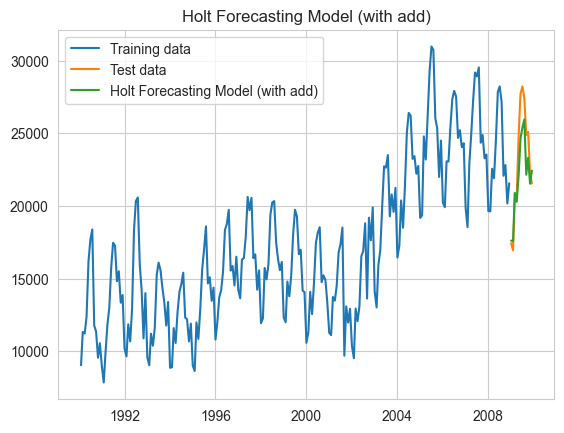

In [177]:
test_model("Holt Forecasting Model (with add)", ExponentialSmoothing(np.asarray(y_train["Passengers"]), seasonal_periods = 12, trend='mul', seasonal='add'))


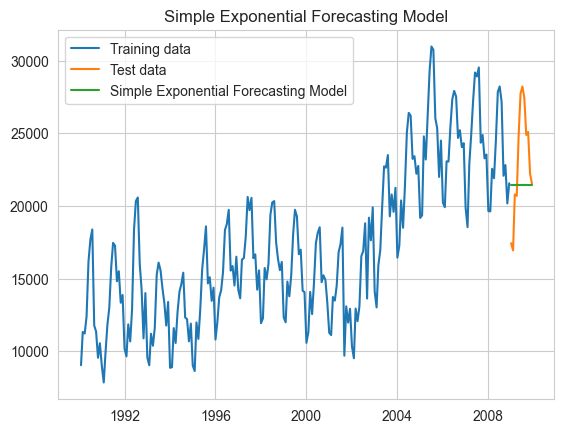

,Name,r2,mse,mae
0,naive_forecast,-0.192336,1.595609e+07,3321.166667
1,Holt Forecasting Model (with add),0.755424,3.272970e+06,1455.757945
2,Simple Exponential Forecasting Model,-0.209587,1.618693e+07,3344.633287


In [178]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
test_model("Simple Exponential Forecasting Model", SimpleExpSmoothing(np.asarray(y_train["Passengers"])))
statsframe

This is the naive forecasting that we implemented manually from before

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


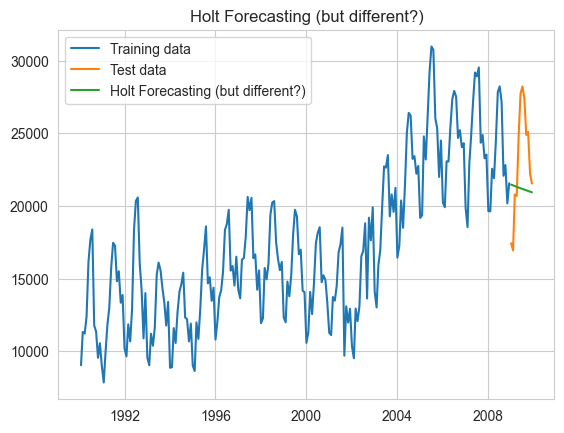

In [179]:
from statsmodels.tsa.holtwinters import Holt
test_model("Holt Forecasting (but different?)", Holt(np.asarray(y_train["Passengers"]), exponential=True, damped_trend=True))

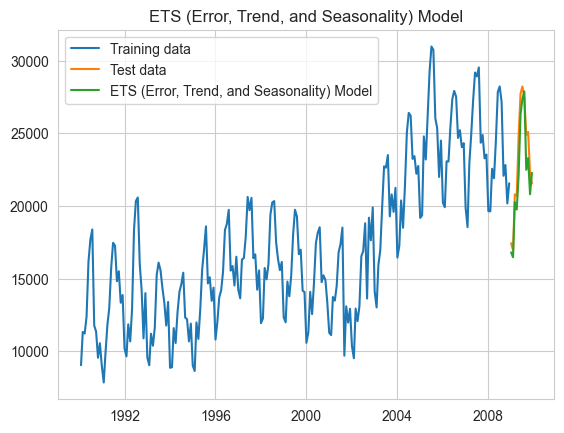

In [180]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
test_model("ETS (Error, Trend, and Seasonality) Model", ETSModel(np.asarray(y_train['Passengers']), error='mul', trend='add', seasonal='mul', seasonal_periods=12))

Quite frankly, I don't know what these parameters mean at the moment, but the graph matches best when they are set this way. So far this seems the most accurate prediction model. 

### Future Work
- Explain statistical models behind the imported functions
    - Holt Winters
- Explanation of parameters in the models
    - Trend
    - Seasonal
- Explain Time Series
- Select some metrics to select a model
- Select a model
- Explain stationary vs non-stationary
- Explain packages used

### Trend and Detrending
- Adfuller Testing (Checking for Trend)
- Box Cox (Decreasing Variance)
- Differencing (Detrending)

In [181]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_passenger["Passengers"])[1]

0.7052533990143073

In [182]:
adfuller(data_passenger["Passengers"].diff().dropna())[1]

0.04236366889577734

In [183]:
from scipy.stats import boxcox
x=boxcox(data_passenger["Passengers"])
adfuller(pd.Series(x[0]).diff().dropna())[1]

5.525543682688963e-05

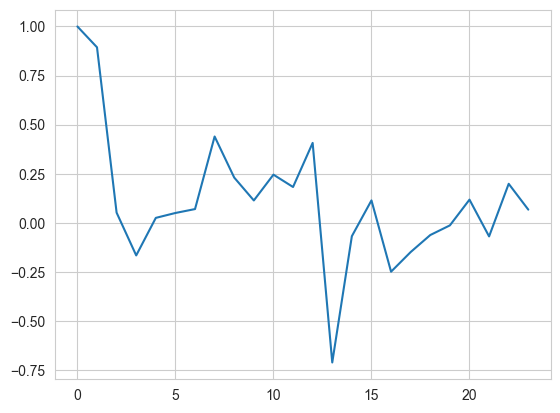

In [184]:
from statsmodels.tsa.stattools import pacf
plt.plot(pacf(y_train["Passengers"]))

In [185]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

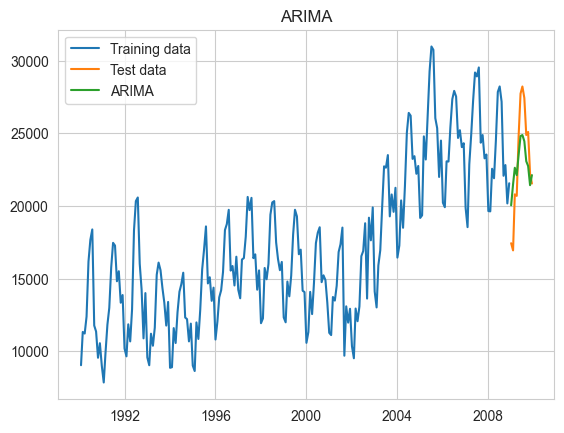

In [186]:
#### model = ARIMA(y_train["Passengers"], trend='ct')
# model = model.fit()

# yhat = y_test.copy()
# yhat["v"] = model.forecast(len(y_test))

# metrics(y_test, yhat["v"])
p, d, q = 12,1,0
#print(y_train["Passengers"].autocorr())
test_model("ARIMA", ARIMA(y_train["Passengers"], order=(p, d, q)))

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


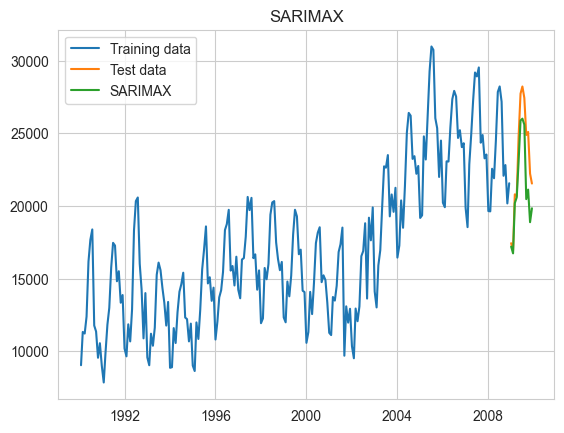

In [187]:

test_model("SARIMAX", SARIMAX(y_train["Passengers"], order=(1,1,0), seasonal_order=(1,1,0,12)))

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


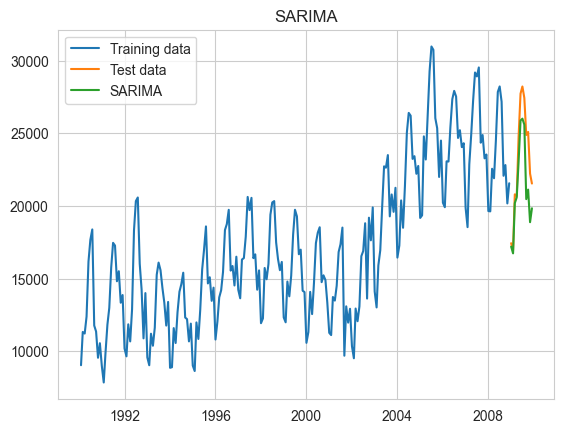

In [188]:
test_model("SARIMA", ARIMA(y_train["Passengers"], order=(1, 1, 0), seasonal_order=(1,1,0,12)))

In [189]:
print(statsframe[statsframe["r2"] == statsframe ["r2"].max()], end="\n\n")
print(statsframe[statsframe["mse"] == statsframe ["mse"].min()], end="\n\n")
print(statsframe[statsframe["mae"] == statsframe ["mae"].min()], end="\n\n")

                                        Name        r2           mse  \
4  ETS (Error, Trend, and Seasonality) Model  0.853278  1.963461e+06   

           mae  
4  1196.227088  

                                        Name        r2           mse  \
4  ETS (Error, Trend, and Seasonality) Model  0.853278  1.963461e+06   

           mae  
4  1196.227088  

                                        Name        r2           mse  \
4  ETS (Error, Trend, and Seasonality) Model  0.853278  1.963461e+06   

           mae  
4  1196.227088  



In [190]:
two_year_train = data_passenger[:'2007'].drop(["Previous", "Difference"], axis=1)
two_year_test = data_passenger['2008':].drop(["Previous", "Difference"], axis=1)

In [191]:
two_hat_naive = two_year_test.copy()
two_hat_naive['Naive'] = two_year_test['Passengers'][-1]
r2, mse, mae = metrics(two_year_test, two_hat_naive["Naive"])
statsframe2 = pd.DataFrame()
statsframe2["Name"] = pd.Series("Naive")
statsframe2["r2"] = pd.Series(r2)
statsframe2["mse"] = pd.Series(mse)
statsframe2["mae"] = pd.Series(mae)
statsframe2

def test_model_two(name, model):
    global two_year_test, two_year_train
    
    model_fit = model.fit()
    #y_hat_model=model_fit.forecast(len(y_test))
    two_hat_model = two_year_test.copy()
    two_hat_model[name] = model_fit.forecast(len(two_year_test))
    
    plt.plot(two_year_train, label='Training data')
    plt.plot(two_year_test, label='Test data')
    plt.plot(two_hat_model[name], label=name)
    
    plt.legend()
    plt.title(name)
    plt.show()
    
    statsframe2.loc[len(statsframe2.index)] = [name] + list(metrics(two_year_test, two_hat_model[name]))

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


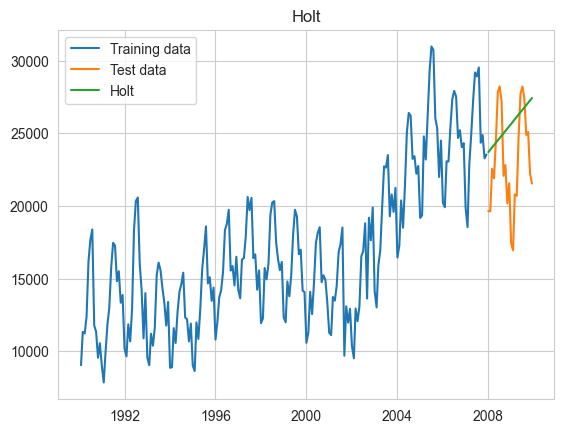

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


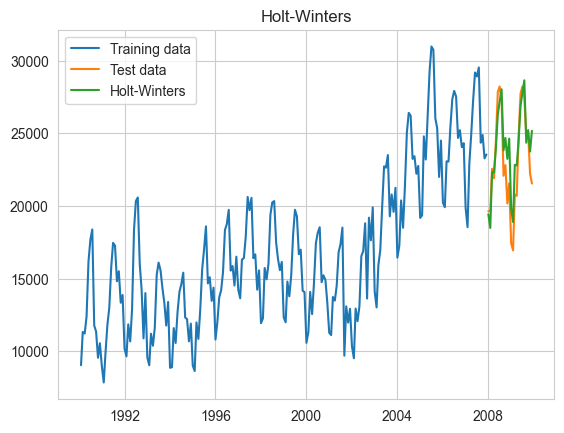

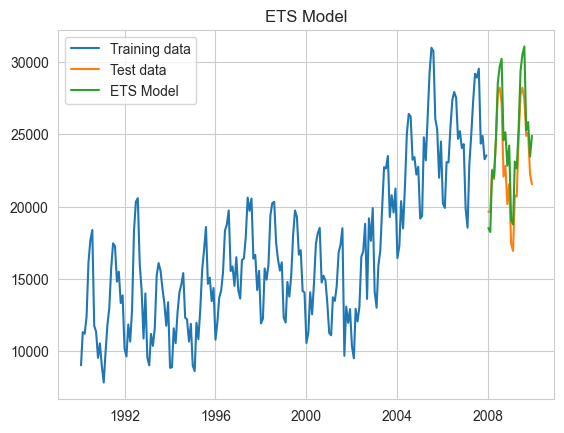

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


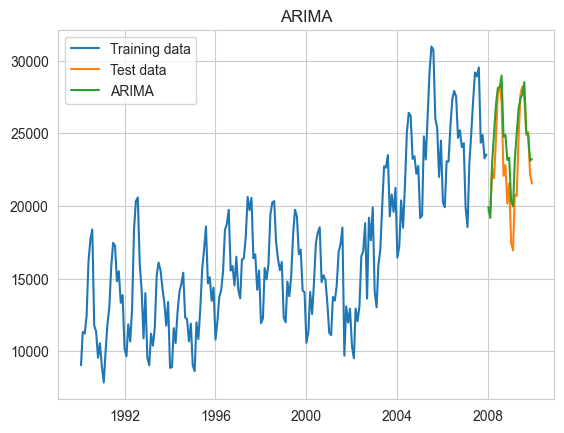

C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


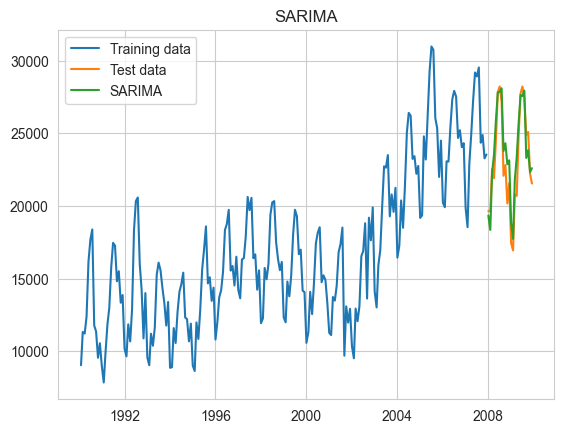

In [192]:
test_model_two("Holt", ExponentialSmoothing(np.asarray(two_year_train["Passengers"]), seasonal_periods = 12, trend='add', seasonal=None))
test_model_two("Holt-Winters", ExponentialSmoothing(np.asarray(two_year_train["Passengers"]), seasonal_periods = 12, trend='add', seasonal='mul'))
test_model_two("ETS Model", ETSModel(np.asarray(two_year_train['Passengers']), error='add', trend='add', seasonal='mul', seasonal_periods=12))
test_model_two("ARIMA", ARIMA(two_year_train["Passengers"], order=(12, 1, 0)))
test_model_two("SARIMA", ARIMA(two_year_train["Passengers"], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12)))

In [193]:
print(statsframe2[statsframe2["r2"] == statsframe2["r2"].max()], end="\n\n")
print(statsframe2[statsframe2["mse"] == statsframe2["mse"].min()], end="\n\n")
print(statsframe2[statsframe2["mae"] == statsframe2["mae"].min()], end="\n\n")
statsframe2

     Name        r2           mse          mae
5  SARIMA  0.850195  1.657662e+06  1072.358259

     Name        r2           mse          mae
5  SARIMA  0.850195  1.657662e+06  1072.358259

     Name        r2           mse          mae
5  SARIMA  0.850195  1.657662e+06  1072.358259



,Name,r2,mse,mae
0,Naive,-0.236695,1.368458e+07,2908.375000
1,Holt,-0.522283,1.684474e+07,3477.588046
2,Holt-Winters,0.744464,2.827620e+06,1365.740457
3,ETS Model,0.658144,3.782785e+06,1656.203158
4,ARIMA,0.648955,3.884468e+06,1568.980877
5,SARIMA,0.850195,1.657662e+06,1072.358259
